Arnie Larson

EEP 506, Spring 2022

Homework 3 

In [2]:
import numpy as np
from scipy import signal
from scipy import special
import matplotlib 
import matplotlib.pyplot as plt

### Problem 1

Derive the $\frac{d}{2 \sigma}$ rule for error rate.

Given a signal with 2 symbols we formulate two hypothesis for what the signal will be given the symbol

$ H_1 : \mathbf{x} \sim N(s_1, \sigma^2)$ when the symbol is $S_1$

$ H_2 : \mathbf{x} \sim N(s_2, \sigma^2)$ when the symbol is $S_2$

This is a 1-d constellation which has a midpoint at $x_o = (s_1 + s_2) / 2$

(See drawing below)

**Note** This is set up as a general 1-d signal with a simple boundary for the decision.  

To derive the error rate rule, we first can write down the probability of an error, assuming that the probabilities of the symbols are equal $P(S_1) = P(S_2) = \frac{1}{2}$

$P_e = \frac{1}{2}P\{\mathbf x > x_o | H_1\} + \frac{1}{2}P\{\mathbf x < x_o | H_2\}$

Convert this to a standard normal $ \mathbf t \sim N(0, 1)$ and use $P( t < a ) = P( t > -a)$ and note that  $x_o - s_1 = (s_2 - s_1)/2 = d/2$ and $-(x_o - s_2) = (s_2 - s_1)/ 2 = d/2$ the expression for $P_e$ reduces to the rule.


$P\{ x > x_o | H_1\} = P\{ s_1 + \sigma t \gt x_o \}  = P\{ t > (x_o - s_1) / \sigma ) \}$
$= P\{ t > d/2\sigma \} = Q(\frac{d}{2\sigma})$



$P\{ x \lt x_o | H_2\} = P\{ s_2 + \sigma t \lt x_o \}  = P\{ t \lt (x_o - s_2) / \sigma ) \} = P\{ t \gt - (x_o - s_2) / \sigma ) = P\{ t > d/2\sigma \} = Q(\frac{d}{2\sigma})\}$

Which leads to the rule $P_e = Q(\frac{d}{2\sigma})$




**Simulation**

Simulate this decision process with Gaussian RV representing the signal.  For BPSK we have $Q\left(\sqrt{\frac{2E_b}{N_o}}\right)$

This is easiest to simulate in 1D with a simple decision boundary at $x=0$.  Note that I think we want the simulation to have probably at least 100 expected events to generate an error rate that is within 10% of the expected rate.

**Trial 1:** Normalize $E_b = 1$, $s_1 = \sqrt{E_b}$ and $s_2 = -\sqrt{E_b}$ let $E_b/N_o = 5$

If $E_h$ (no gain?) is unity, then $\sigma = \sqrt{P_n} = \sqrt{N_o/2} = \sqrt{.1}$

I find for this SNR that the real $P_e \approx 0.078 \%$

I find that simulations with agree within a few % which is expected

**Trial 2:** Normalize $E_b = 1$, and let $E_b/N_o = 6.9$, $\sigma = \sqrt{1/13.8}$

For this the real $P_e \approx 0.01 \%$ and I find that simulations tend to agree withing about 10% as expected.

In [3]:
## Expected error rate Q(x) = 0.5 * erfc(x/sqrt(2))
Pe=0.5*special.erfc(np.sqrt(5))
print("Expected error rate Pe = {:.7f}".format(Pe))

Expected error rate Pe = 0.0007827


In [4]:
## Trial 1 = Eb / No = 5, Pe = 0.078%
## Let s1 = 1; s2 = -1; sigma = sqrt(.2/2)
s1=1; s2=-1; sigma=np.sqrt(.1); N = 10e5;
rng = np.random.default_rng()
S1 = rng.normal(s1, sigma, int(N))  # error when RV trial S1 < 0
S2 = rng.normal(s2, sigma, int(N))  # error when RV tiral S2 > 0
errors_s1 = sum(S1<0)
errors_s2 = sum(S2>0)
error_rate = (errors_s1 + errors_s2)/(2*N)
sim_rel_error = np.abs(Pe-error_rate)/Pe
print("S1 Errors = {}, (expected {:.0f})".format(errors_s1, Pe*N))

print("S2 Errors = {}, (expected {:.0f})".format(errors_s2, Pe*N))

print("Simulation Error rate = {}".format(error_rate))
print("Relative error of simulation: {:.1f} %".format(sim_rel_error*100))

S1 Errors = 781, (expected 783)
S2 Errors = 763, (expected 783)
Simulation Error rate = 0.000772
Relative error of simulation: 1.4 %


In [6]:
## Trial 2 = Eb / No = 6.9, Pe = 0.001%  (Or 1e-4)
## Let s1 = 1; s2 = -1; sigma = sqrt(1/13.8)
Pe=0.5*special.erfc(np.sqrt(6.9))
print("Expected error rate Pe = {:.7f}".format(Pe))
s1=1; s2=-1; sigma=np.sqrt(1/13.8); N = 10e5;
rng = np.random.default_rng()
S1 = rng.normal(s1, sigma, int(N))  # error when RV trial S1 < 0
S2 = rng.normal(s2, sigma, int(N))  # error when RV tiral S2 > 0
errors_s1 = sum(S1<0)
errors_s2 = sum(S2>0)
error_rate = (errors_s1 + errors_s2)/(2*N)
sim_rel_error = np.abs(Pe-error_rate)/Pe
print("S1 Errors = {}, (expected {:.0f})".format(errors_s1, Pe*N))

print("S2 Errors = {}, (expected {:.0f})".format(errors_s2, Pe*N))

print("Simulation Error rate = {}".format(error_rate))
print("Relative error of simulation: {:.1f} %".format(sim_rel_error*100))

Expected error rate Pe = 0.0001017
S1 Errors = 100, (expected 102)
S2 Errors = 122, (expected 102)
Simulation Error rate = 0.000111
Relative error of simulation: 9.2 %


### Problem 2

Derive the SNR power ratio in terms of $E_b$ the energy per bit.  

As we've looked at previously, the noise Power $P_n = \sigma_n^2 = \frac{N_o}{2}T = N_o B$.  (This can be considered just using scaling laws and is also correct for a non realizable ideal filter)

Average signal power (per symbol) is $P_s = E_s / T$ is the energy per symbol per symbol time.  ($E_s$ is the average energy per symbol) 

From M-ary Comms lecture we've see $\frac{bits}{sec} = \frac{sym}{sec} \frac{bits}{sym} \rightarrow R_b = R_s log_2(M)$

Similarly for Energy $\frac{energy}{bit} = \frac{energy}{sym} \frac{sym}{bit} \rightarrow E_b = E_s / log_2(M)$

Therefore $SNR = \frac{P_s}{P_n} = \frac{E_s}{2N_o} = \frac{E_b log_2(M)}{2 N_o}$

Text(0.5, 1.0, 'E_b - Energy per bit [in E_s]')

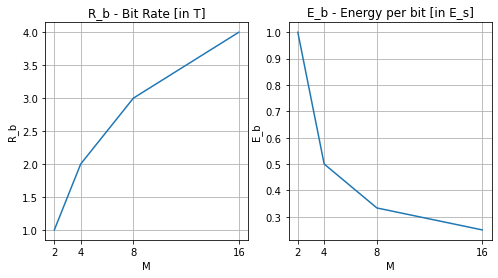

In [56]:
M=[2,4,8,16]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(M, np.log2(M)); ax1.set_xticks([2,4,8,16]);
ax1.grid(True); ax1.set_ylabel("R_b"); ax1.set_xlabel("M"); 
ax1.set_title("R_b - Bit Rate [in T]")
ax2.plot(M, 1/np.log2(M)); ax2.set_xticks([2,4,8,16]);
ax2.grid(True); ax2.set_ylabel("E_b"); ax2.set_xlabel("M"); 
ax2.set_title("E_b - Energy per bit [in E_s]")

![xx](img/PXL_20220427_044551222.jpeg)